BUAD 5092 Module 6

Jason Street

# Part 1
## Model Formulation
Formulate a nonlinear optimization model that minimizes portfolio risk while ensuring expected returns meet some minimum level (rmin). You may use summation notation with indices or matrix notation.

**Sets** \
$S$: set of stocks

**Parameters** \
$\mu_i$: expected return of stock $i$ for $i \in S$ \
$C_{ij}$: covariance between the returns of stocks $i$ and $j$ for $i, j \in S$ \
$r_{\text{min}}$: minimum acceptable portfolio return

**Decision Variables** \
$x_i$: weight of stock $i$ in the portfolio for $i \in S$

**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{i,j \in S}{\sum} x_i x_j C_{ij} &\\
\textrm{s.t. } & \underset{i \in S}{\sum} \mu_i x_i & \geq & r_{\text{min}} \\ 
& \underset{i \in S}{\sum} x_i & = & 1 \\ 
& x_i & \geq & 0, & \forall i \in S 
\end{matrix}
\end{equation*}

# Part 2
## Excel Prototype

Prototype your model using Excel solver. Solve the simple portfolio optimization problem in your textbook, Practical Management Science, Example 7.9 in Chapter 7. Make sure you get the same answer before proceeding. Your PDF report should include a screenshot of your Excel model. Do not just take a screenshot of the figure in the book.

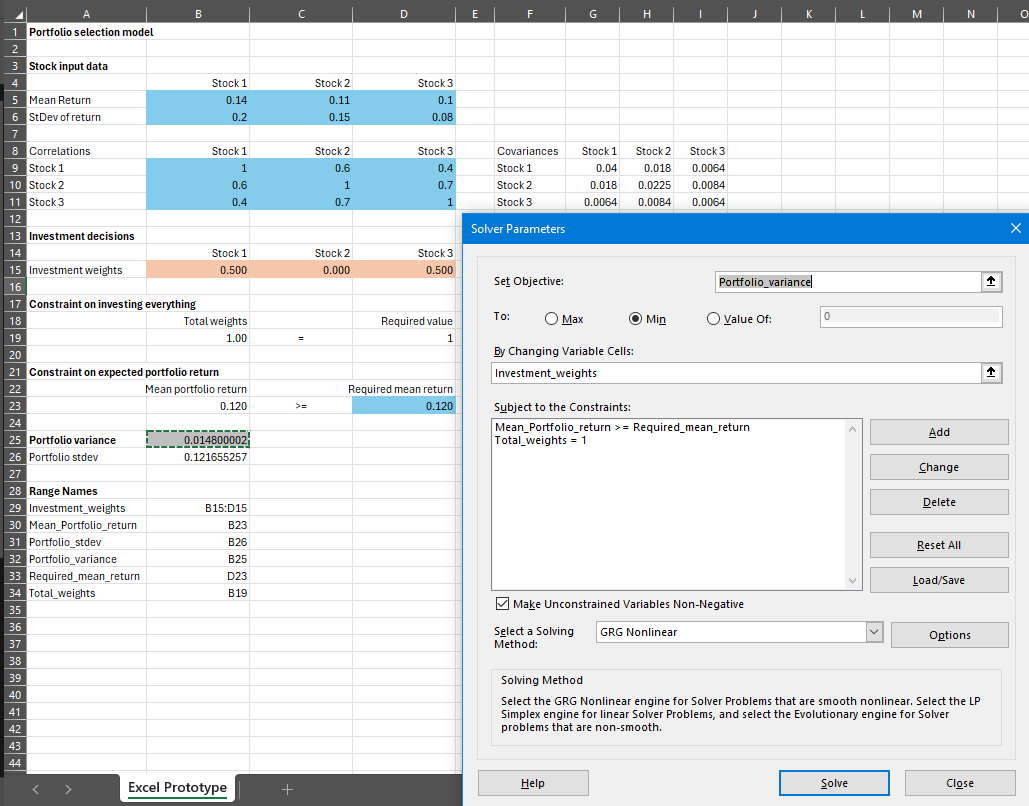

In [1]:
from IPython import display
display.Image("./M6_q2_screenshot.png")

# Part 3
## Python Prototype

Build the same portfolio optimization model in Python and solve using Gurobi. Use Pandas Series and DataFrame objects to store your data. For example, the average return vector can be stored as “avg = pd.Series([0.14,0.11,0.1], copy=False)”. Since you already know the covariance matrix values, you may enter them directly without calculating them from the standard deviations and correlations (as is done in the textbook example). This also means that your decision variables will need to be declared as a Pandas Series. The benefit of using Pandas data structures for this problem is that it greatly simplifies model calculations. For example, if your decision variables are stored in a Pandas Series named x and your covariance matrix is stored in a Pandas DataFrame named cov, then your model’s objective function can be written as “x @ cov @ x”. (Watch out! All the row and column indices in x and cov must match for the @ inner product operator to work properly.) You may need to do some independent online research to figure out how to store the covariance matrix as a Pandas DataFrame and declare your decision variables as a Pandas Series if you are unfamiliar with the syntax. Ensure that your code prints out the optimal values for risk (i.e., square root of the variance), expected return, and portfolio allocation weights. Make sure you get the same answer that you got for question 2 above. This model validation step is key to solving this project efficiently (it will save much troubleshooting if you run into errors later), and it is even more critical when model building in your career.

In [2]:
import pandas as pd
from gurobipy import *
m = Model('PortfolioOptimization')

# data from book/excel
avg_returns = pd.Series([0.14, 0.11, 0.1], index=['Stock1', 'Stock2', 'Stock3'], copy=False)
cov_matrix = pd.DataFrame([
    [0.04, 0.018, 0.0064],
    [0.018, 0.0225, 0.0084],
    [0.0064, 0.0084, 0.0064]
], index=['Stock1', 'Stock2', 'Stock3'], columns=['Stock1', 'Stock2', 'Stock3'], copy=False)

# Decision Variables
## portfolio weights
x = pd.Series(m.addVars(avg_returns.index, lb=0, name='x'), index=avg_returns.index)

# Objective Function to minimize variance
m.setObjective(x @ cov_matrix @ x, GRB.MINIMIZE)

# Constraints
## invest amount
m.addConstr(x.sum() == 1, name='Budget')
## expected return
m.addConstr(x @ avg_returns >= 0.12, name='Return')

# Optimize and output
m.optimize()
print("\nOptimal Portfolio Weights:")
for stock in avg_returns.index:
    print(f"{stock}: {x[stock].X}")
print(f"\nOptimal Portfolio Variance: {m.objVal}")
print(f"Optimal Portfolio Risk (standard deviation): {m.objVal**0.5}")
print(f"Expected Portfolio Return: {sum(avg_returns[stock] * x[stock].X for stock in avg_returns.index)}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-07
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0xb929c9a2
Model has 6 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 6 nonzeros
Presolved model has 6 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 2
 AA' NZ     : 6.000e+00
 Factor NZ  : 1.000e+01
 Factor Ops : 3.000e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter

# Part 4
## Data Wrangling

Modify your Python code to read in the provided data set of average monthly returns for many different NASDAQ stocks over several years as a Pandas DataFrame. Use the Pandas mean() and cov() attributes to calculate the mean return and the covariance matrix, and store them in variables named avg and cov respectively. Use the following lines of code to print out the first five rows of avg and cov.

print("The first five rows of the average return vector are:")\
print(avg.head())\
print("\nThe first five rows of the covariance matrix are:")\
print(cov.head())

In [3]:
import pandas as pd

# read in data from file
file_name = 'buad5092-m6-nonlinear-optimization-assignment-data.xlsx'
data = pd.read_excel(file_name, sheet_name='nasdaq returns', index_col=0)

# mean return and covariance matrix
avg = data.mean()
cov = data.cov()

# print first five rows of avg and cov
print("The first five rows of the average return vector are:")
print(avg.head())
print("The first five rows of the covariance matrix are:")
print(cov.head())

The first five rows of the average return vector are:
AAON    0.012440
AAPL    0.018451
ABAX    0.022386
ABCB    0.001089
ABFS    0.012239
dtype: float64
The first five rows of the covariance matrix are:
          AAON      AAPL      ABAX      ABCB      ABFS      ABMD      ACAT  \
AAON  0.013376  0.003254  0.002771  0.003015  0.002034 -0.001239  0.003649   
AAPL  0.003254  0.023868  0.004237  0.001578  0.002114  0.002250  0.003812   
ABAX  0.002771  0.004237  0.019898  0.002158  0.002370  0.005486  0.003223   
ABCB  0.003015  0.001578  0.002158  0.011670  0.003913  0.004294  0.003478   
ABFS  0.002034  0.002114  0.002370  0.003913  0.015009  0.003271  0.003639   

          ACCL      ACET      ACGL  ...      YHOO      YORW      ZBRA  \
AAON  0.003190  0.004369  0.001110  ...  0.003532  0.002542  0.003865   
AAPL  0.006375  0.000304  0.000825  ...  0.009827  0.002796  0.005158   
ABAX  0.005139  0.001446  0.001253  ...  0.005938  0.001726  0.002125   
ABCB  0.002404  0.003627  0.002430 

# Part 5
## Python Model (Min Risk)

Use your Python model to solve using Gurobi for the minimum risk NASDAQ stock portfolio assuming the there is no expected return requirement (i.e., rmin = 0). Ensure that your code prints out the optimal values for risk (i.e., square root of the variance) and expected return. Do not print the portfolio allocation weights.

In [4]:
from gurobipy import *
m = Model('MinRiskPortfolio')

# Decision Variables
## portfolio weights
x = pd.Series(m.addVars(avg.index, lb=0, name='x'), index=avg.index)

# Objective Function to minimize variance
m.setObjective(x @ cov @ x, GRB.MINIMIZE)

# Constraints
## invest amount
m.addConstr(x.sum() == 1, name='Budget')

# Optimize and output
m.optimize()
print(f"\nOptimal Portfolio Variance: {m.objVal}")
print(f"Optimal Portfolio Risk (standard deviation): {m.objVal**0.5}")
print(f"Expected Portfolio Return: {sum(avg[stock] * x[stock].X for stock in avg.index)}")

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 1158 columns and 1158 nonzeros
Model fingerprint: 0xb540f411
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.11s
Presolved: 1 rows, 1158 columns, 1158 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.140e+03
 Factor NZ  : 7.260e+03 (roughly 1 MB of memory)
 Factor Ops : 5.832e+05 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal

# Part 6
## Python Model (Largest Return)

Modify your model to resolve the problem assuming that the expected return requirement is set to the largest expect return (i.e., rmin = avg.max()). Ensure that your code prints out the optimal values for risk (i.e., square root of the variance) and expected return. Do not print the portfolio allocation weights.

In [5]:
# modifications
rmin = avg.max()
## return constraint
m.addConstr(sum(avg[stock] * x[stock] for stock in avg.index) >= rmin, name='ReturnConstraint')

# Optimize and output
m.optimize()
print(f"\nOptimal Portfolio Variance: {m.objVal}")
print(f"Optimal Portfolio Risk (standard deviation): {m.objVal**0.5}")
print(f"Expected Portfolio Return: {sum(avg[stock] * x[stock].X for stock in avg.index)}")

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x5f5658d2
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-02, 1e+00]
Presolve time: 0.10s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal

# Part 7
## Efficient Frontier

Graph the efficient frontier of the NASDAQ portfolio. Loop over several rmin values between the lowest expected return value (i.e., expected return printed out in question 5) and the highest expected return value (i.e., expected return printed out in question 6), and save the risk and expected return at each iteration. Use these values to plot the efficient frontier using plot() function from the matplotlib.pyplot library.

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x69bab2c9
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 1e+00]
Presolve time: 0.10s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.06436430e-19 -7.06436430e-19  1.15e+06 2.58e-09  1.00e+06     0s
   1   4.76909952e+02 -4.91878825e+02  5.95e+04 1.33e-10  5.17e+04     0s
   2   1.76800993e+02 -1.92684484e+02  5.88e+02 1.32e-12  5.32e+02     0s
   3   1.38630152e+00 -1.80030897e+01  3.93e+00 1.02e-14  4.62e+00     0s
   4   6.23930919e-02 -1.08516497e+01  3.93e-06 3.33e-16  6.03e-01     0s
   5   6.15777367e-02 -8.51900145e-02  5.28e-08 1.11e-16  8.10e-03     0s
   6   9.46052503e-03 -1.20427866e-01  1.87e-08 1.39e-16  7.17e-03     0s
   7   5.56968839e-03 -7.29849518e-03  1.70e-09 2.78e-17  7.11e-04     0s
   8   3.67077901e-03 -7.27606483e-03  1.16e-09 2.78e-17  6.04e-04     0s
   9   1.40237964e-03

   5   6.19113541e-02 -8.35343561e-02  5.28e-08 1.11e-16  8.03e-03     0s
   6   9.72070581e-03 -1.18977160e-01  1.87e-08 6.94e-17  7.11e-03     0s
   7   5.68151424e-03 -7.11528096e-03  1.69e-09 2.78e-17  7.07e-04     0s
   8   3.77455220e-03 -7.08989439e-03  1.16e-09 2.78e-17  6.00e-04     0s
   9   1.38631435e-03 -1.58874182e-03  7.87e-11 1.39e-17  1.64e-04     0s
  10   8.13276302e-04 -1.40774856e-03  1.78e-15 2.22e-16  1.23e-04     0s
  11   4.73518996e-04 -1.71434187e-04  6.66e-16 1.67e-16  3.56e-05     0s
  12   3.22012811e-04  8.95973170e-06  7.77e-16 1.11e-16  1.73e-05     0s
  13   2.44842277e-04  1.14028133e-04  1.33e-15 1.11e-16  7.22e-06     0s
  14   1.86574136e-04  1.54315220e-04  8.88e-16 8.33e-17  1.78e-06     0s
  15   1.69013274e-04  1.60396041e-04  8.88e-16 1.11e-16  4.76e-07     0s
  16   1.61880316e-04  1.61393527e-04  1.02e-14 6.94e-17  2.69e-08     0s
  17   1.61445572e-04  1.61437576e-04  8.22e-15 5.55e-17  4.42e-10     0s

Barrier solved model in 17 iterations

  16   7.64596906e-04  7.55146656e-04  2.32e-14 1.67e-16  5.22e-07     0s
  17   7.56607048e-04  7.56022297e-04  1.11e-13 1.67e-16  3.23e-08     0s
  18   7.56060694e-04  7.56058963e-04  5.71e-14 1.67e-16  9.56e-11     0s

Barrier solved model in 18 iterations and 0.27 seconds (0.07 work units)
Optimal objective 7.56060694e-04

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0xd28e6175
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 1e+00]
Presolve time: 0.09s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 qua


Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x3a4b2ece
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-02, 1e+00]
Presolve time: 0.10s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.75797839e-18 -2.75797839e-18  1.15e+06 8.43e-09  1.00e+06     0s
   1   4.76915109e+02 -4.91335397e+02  5.95e+04 4.35e-10  5.17e+04     0s
   2   1.76870589e+02 -1.91720047e+02  5.89e+02 4.30e-12  5.32e+02 

 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.35271493e-18 -4.35271493e-18  1.15e+06 1.05e-08  1.00e+06     0s
   1   4.76915499e+02 -4.91170792e+02  5.95e+04 5.43e-10  5.17e+04     0s
   2   1.76891254e+02 -1.91429487e+02  5.89e+02 5.38e-12  5.32e+02     0s
   3   1.40912557e+00 -1.69016948e+01  3.98e+00 3.29e-14  4.61e+00     0s
   4   1.20319395e-01 -1.11855284e+01  4.05e-01 3.44e-15  8.97e-01     0s
   5   1.38392106e-01 -5.27592766e+00  1.73e-01 1.44e-15  4.78e-01     0s
   6   1.62653230e-01 -7.31427629e-01  1.73e-07 1.11e-16  4.94e-02     0s
   7   1.49330917e-01 -4.79248622e-02  3.64e-08 1.11e-16  1.09e-02     0s
   8   9.30461378e-02 -8.06891308e-02  4.35e-10 1.11e-16  9.59e-03     0s
   9   8.85853137e-02  1.42554513e-02  1.64e-10 2.22e-16  4

  13   2.85872878e-01  2.85872878e-01  4.54e-12 4.26e-14  2.32e-12     0s

Barrier solved model in 13 iterations and 0.28 seconds (0.05 work units)
Optimal objective 2.85872878e-01

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x5f5658d2
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-02, 1e+00]
Presolve time: 0.11s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of 

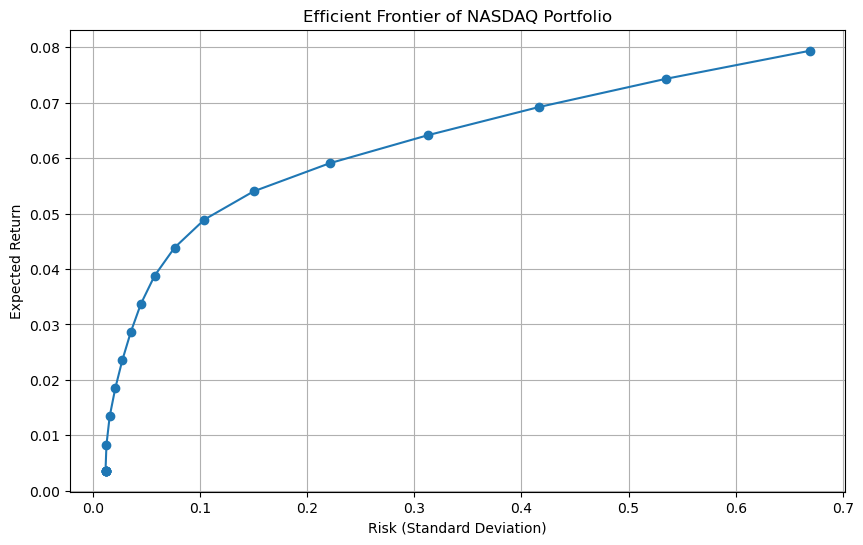

In [6]:
import matplotlib.pyplot as plt
m = Model('EfficientFrontier')

# Decision Variables
## portfolio weights
x = pd.Series(m.addVars(avg.index, lb=0, name='x'), index=avg.index)

# Objective Function to minimize variance
m.setObjective(x @ cov @ x, GRB.MINIMIZE)

# Constraints
## invest amount
m.addConstr(x.sum() == 1, name='Budget')

# range for rmin values
expected_returns = []
risks = []

steps = 20
rmin_values = [avg.min() + i * (avg.max() - avg.min()) / steps for i in range(steps + 1)]

# loop over rmin values to calculate risk and expected return
for rmin in rmin_values:
    # remove previous return
    for c in m.getConstrs():
        if c.ConstrName == 'ReturnConstraint':
            m.remove(c)
    
    # add new return
    m.addConstr(sum(avg[stock] * x[stock] for stock in avg.index) >= rmin, name='ReturnConstraint')
    
    # Optimize
    m.optimize()
    
    # store expected return and risk
    expected_return = sum(avg[stock] * x[stock].X for stock in avg.index)
    risk = m.objVal**0.5
    expected_returns.append(expected_return)
    risks.append(risk)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(risks, expected_returns, marker='o')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier of NASDAQ Portfolio')
plt.grid(True)
plt.show()

## Part 8
## Analysis

**Explain how a financial analyst may be able to use your analysis.**

A financial analyst can use the analysis and results from the efficient frontier to make informed investment decisions by understanding the pattern of risk vs return and identifying the most efficient portfolios that offer the highest expected return for a given level of risk or vice versa. By evaluating different points along the efficient frontier, analysts can choose the optimal portfolio that aligns with the investment goals and risk tolerance of their clients. It would assist in highlighting benefits of diversification as well as strategic asset allocation decisions, helping construct diversified portfolios that maximize returns for a given level of risk while managing risk within levels comfortable to the client. The graph, as a visual representation of the efficient frontier, is an effective tool for enhancing the client's understanding and gaining their trust in the choice of investment strategy that would be best suited for their desires.